In [385]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
%matplotlib inline

In [456]:
#import season neilsen ratings from wiki
views_df=pd.read_csv('seasons.csv')
views_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          10 non-null     float64
 1   no_ep           10 non-null     float64
 2   year            9 non-null      float64
 3   premiere_views  9 non-null      float64
 4   finale_views    9 non-null      float64
 5   rank            9 non-null      float64
 6   avg.viewers     9 non-null      float64
 7   18-49           9 non-null      float64
dtypes: float64(8)
memory usage: 1.1 KB


In [460]:
views_df=views_df.iloc[0:9, :]
views_df['season']=views_df['season'].apply(lambda x: int(x))
views_df['year']=views_df['year'].apply(lambda x: int(x))
views_df['no_ep']=views_df['no_ep'].apply(lambda x: int(x))

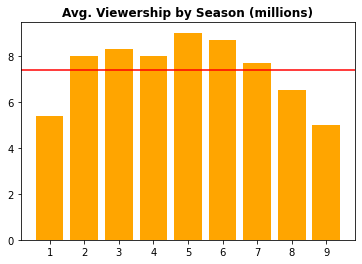

In [462]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.bar(views_df.season, views_df['avg.viewers'], color='orange')
plt.xticks(views_df.season)
plt.axhline(y=(views_df['avg.viewers'].mean()), color='r' )
plt.title('Avg. Viewership by Season (millions)', weight='bold', )
plt.savefig('viewership.png', transparent=True)
plt.show()

In [196]:
def get_ep_num(season, ep):
    answer =25300 +ep + views_df.loc[1:(season-1), 'no_eps'].sum()
    if answer >= 25307 and answer < 25330:
        answer +=1   
    #season 3 extra ep
    if answer >= 25330 and answer < 25355
        answer +=3
    #season 4extra ep
    if answer >= 25355 and answer < 25370:
        answer +=5
    #season 5 xtra ep    
    if answer >= 25370 and answer < 25398:
        answer +=6
    #season 6 xtra ep                
    if answer >= 25398 and answer < 25426:
        answer +=10
                
    return answer
            

    



In [330]:
#page numbers for seasons, double weighted if 1hr-long episode

season_2= [i for i in range(25308, 25330)]

season_3 =([25354]+
           [i for i in range(25332, 25341)]+
           [i for i in range(25342, 25354)])

season_4 = ([25356, 25357, 25358, 23539, 25369] + 
            [i for i in range(25360, 25369)])

season_5= ([25372, 25384]+
           [i for i in range(25373,25384)]+
           [i for i in range(25385,25398)])

season_6=([25405, 25417]+
          [i for i in range(25402,25405)]+
          [i for i in range(25406,25417)]+
          [i for i in range(25418,25426)])

season_7=([25437, 25450]+
          [i for i in range(25427,25437)]+
          [i for i in range(25438, 25450)])

In [331]:
#randomly selecting episodes
from numpy import random
np.random.seed(seed=42)
ep_scrape = np.random.choice(season_2, size=(len(season_2)//2), replace=False)
for i in [season_3, season_4, season_5, season_6, season_7]:
    eps = np.random.choice(i, size=(len(i)//2), replace=False)
    ep_scrape = np.append(ep_scrape, eps)


In [86]:
# start with one page
url = 'https://transcripts.foreverdreaming.org/viewtopic.php?f=574&t=25405'
response = requests.get(url)
page = response.text
soup= bs(page)

script = soup.find(class_='postbody').find_all('p')
script = [item.text.split(': ').lower() for item in script]


#pull episode info
ep_info = [item.text for item in soup.find(class_='t-header clearfix').find_all('div')]
season = int(ep_info[0][:2])
ep_no = int(ep_info[0][3:5].rstrip(" "))
ep_series = (season, ep_no)

#parsing script by character
char_list=[]
script_dicts = []
for i in script:
    if len(i)>1:
        if i[0] not in char_list:
            char_list.append(i[0])

for i in char_list:
    char_dialogue = {'character':i, 'episode': ep_info[0], 'lines':[]}
    for b in script:
        if b[0] == i:
            char_dialogue['lines'].append(b[1])
    script_dicts.append(char_dialogue)

## Scrape Episode Scripts

In [405]:
ends = [str(i) for i in ep_scrape]
url_base = 'https://transcripts.foreverdreaming.org/viewtopic.php?f=574&t='
script_dicts = []
for i in ends:
    url = url_base+i
    response = requests.get(url)
    page = response.text
    soup= bs(page)
    script = soup.find(class_='postbody').find_all('p')
    script = [item.text.split(': ') for item in script]
    
    #pull episode info
    ep_info = [item.text for item in soup.find(class_='t-header clearfix').find_all('div')]
    season = int(ep_info[0][:2])
    ep_no = int(ep_info[0][3:5].rstrip(" "))
    ep_series = (season, ep_no)
    
    #parsing script by character
    char_list=[]
    for i in script:
        if len(i)>1:
            #correcting character typos
            if i[0] in ['Anglea' ,'Angel' ,'Angels']:
                i[0]='Angela'
               
            if i[0] in ['Darrly', 'Darry', 'Daryl']:
                i[0]='Darryl'
        
            if i[0] in ['Dight', 'DwightKSchrute', 'Dwight:', 'Dwight '] :
                i[0]='Dwight'
              
            
            if i[0] in ['M ichael', 'MIchael', 'Micahel','Michae', 'Michal', 'Michel',
                        'Miichael', 'Michael ', 'Micheal', 'Mic', 'Mihael'] :
                
                i[0]='Michael'
            
            if i[0] in ['Jim ', ' Jim'] :
              
                i[0]='Jim'
            
            if i[0]=='Phyliss':
    
                i[0]='Phyllis'
            
            if i[0] in ['Meridith', 'Meridith']:
                i[0]='Meredith'
            
            if i[0] not in char_list:
                char_list.append(i[0])
    
    for i in char_list:
    
        char_dialogue = {'character':i, 'episode_no': ep_series,
                     'ep_name': ep_info[0][8:], 'lines':''}
        for b in script:
            if b[0] == i:
                char_dialogue['lines']+=' '+ b[1]
        script_dicts.append(char_dialogue)

In [406]:
scripts = pd.DataFrame(script_dicts)

In [407]:
scripts["season"]=scripts.episode_no.apply(lambda x: x[0])
scripts["ep"]=scripts.episode_no.apply(lambda x: x[1])
scripts['no_char']=scripts.lines.apply(lambda x: len(x))
scripts.groupby(['character'], as_index=False)['no_char'].nunique().sort_values('character', ascending=False)

,character,no_char
355,song,1
354,sAndy,1
353,abe,1
352,Zion,1
351,Younger Guy,1
350,Young Michael,1
349,Young Man,1
348,Women,1
347,Woman over speakerphone,1
346,Woman in line,1


In [396]:
scripts.groupby(['season','character'], as_index=False)['no_char'].mean().sort_values(['season','no_char'], ascending=False)

,season,character,no_char
0,7,Meridith,0


In [471]:
scripts['no_char']=scripts['no_char'].apply(lambda x: int(x))
char_scripts = scripts.groupby(['character'],as_index=False)['no_char'].sum().sort_values('no_char', ascending=False)
print(f"no. documents : {len(docs_df.ep_name.unique())}")
print(f'no. non-unique characters: {np.sum(char_scripts.iloc[0:8, 1])}')

no. documents : 66
no. non-unique characters: 886197


In [ ]:
scripts[scripts.ep_name=='Goodbye, Michael']

In [431]:
import re
scripts_df = scripts.copy()
scripts_df['lines']= scripts_df.lines.apply(lambda x: x.lower())
#remove action prompts
scripts_df['lines'] = scripts_df.lines.replace('\[.*?\]', '',regex=True)
(\[.*?\])

#remove of punctuation
scripts_df['lines'] = scripts_df.lines.map(
    lambda x: re.sub(r'[^\w\s]', '', x))

#remove digits
scripts_df['lines'] = scripts_df.lines.map(
    lambda x: re.sub(r'[0-9]', '', x))
docs_df['ep_name']=docs_df.ep_name.apply(lambda x: x.strip('- '))
docs_df['lines']=docs_df.lines.apply(lambda x: x.strip(' ').strip(' ').strip(' '))
docs_df['no_char']=docs_df.lines.apply(lambda x: len(x))


In [433]:
docs_df=scripts_df.sort_values(['season', 'no_char'], ascending=[True, False])
docs_df.to_pickle("docs.pkl") 

In [473]:
script_raw_df = scripts.copy()
script_raw_df['lines']= script_raw_df.lines.apply(lambda x: x.lower())
script_raw_df=script_raw_df.sort_values(['season', 'no_char'], ascending=[True, False])
script_raw_df.to_pickle("docs_raw.pkl") 

In [432]:
docs_df[docs_df.ep_name=='Goodbye, Michael']

,character,episode_no,ep_name,lines,season,ep,no_char
1346,Michael,"(7, 22)","Goodbye, Michael",well im moving to colorado to start my new lif...,7,22,7367
1348,DeAngelo,"(7, 22)","Goodbye, Michael",youre not gonna take all these toys are you i ...,7,22,2181
1347,Dwight,"(7, 22)","Goodbye, Michael",michael ive got a treat for you colorado speci...,7,22,969
1354,Pam,"(7, 22)","Goodbye, Michael",whats wrong with cupcakes well we all wanted t...,7,22,888
1350,Andy,"(7, 22)","Goodbye, Michael",hey why dont you uh stay away from me okay tha...,7,22,838
1351,Jim,"(7, 22)","Goodbye, Michael",so you guys are filming people when they go to...,7,22,858
1352,Phyllis,"(7, 22)","Goodbye, Michael",how about cupcakes the three of us have all be...,7,22,746
1349,Gabe,"(7, 22)","Goodbye, Michael",stay away from erin im your boss no im gonna ...,7,22,503
1353,Angela,"(7, 22)","Goodbye, Michael",please everything its an experiment the dream ...,7,22,438
1363,Erin,"(7, 22)","Goodbye, Michael",gabe you cant be in here this is a ladys room ...,7,22,392
